# Summary

Derive all the equations of GME theory (where possible), using SymPy, for a given erosion model type ($\sin\beta$ or $\tan\beta$), slope exponent $\eta \in \left\{\tfrac{1}{4}, \tfrac{1}{3}, \tfrac{1}{2}, \tfrac{3}{2}\right\}$, and ratio of area/slope exponent $\mu/\eta$ (usually set to 1/2).

### Preliminaries

In [1]:
# Specify the parameter files for the job
import os
if 'GME_NB_PR' not in os.environ.keys():
    pr_filenames = ['Derivation_sinbeta_eta1p5_ratio0p5']
#     pr_filenames = ['Derivation_sinbeta_eta0p5_ratio0p5']
#     pr_filenames = ['Derivation_sinbeta_eta0p33_ratio1p0']
#     pr_filenames = ['Derivation_sinbeta_eta0p25_ratio1p0']
else:
    pr_filenames = eval(os.environ['GME_NB_PR'])
    
# Import Sympy and Numpy and set up latex inline & pretty dict printing
import sympy as sy, numpy as np
sy.init_printing(pretty_print=True,wrap_line=True)
from sympy import Rational, simplify, factor, Matrix, Eq, \
                    solve, sin, cos, tan, atan, asin, Abs, sqrt, re, im, N, \
                    numer, denom, expand, Piecewise, lambdify, deg
from pprint import PrettyPrinter
pp = PrettyPrinter(indent=4).pprint

# Import Geomorphysics library functions, classes
from gmplib.utils import numify, export_results, e2d, omitdict, round as gmround
from gmplib.save import create_directories, export_plots
from gmplib.parameters import import_parameters, Parameters

# Import GME classes and do a wildcard (!) import of all GME symbol definitions
from gme.symbols import *
from gme.equations import Equations

# Decide where we're working and thus where to find the job parameter files
#   -  use the GME_WORKING_PATH environment variable if it's defined
#   -  otherwise, deduce that we're working in the GME notebook dir
if 'GME_WORKING_PATH' in os.environ.keys():
    working_path = os.environ['GME_WORKING_PATH']
    print(f'Fetching working path from environment variable GME_WORKING_PATH = {working_path}')
else:
    from gmplib.utils import get_pkg_path
    import gme
    working_path = get_pkg_path(gme, dirname='')
    print(f'Deducing working path from GME package location = {working_path}')
    del gme
    
# Set the path to the parameter files for this nb and report
pr_path = os.path.join(working_path,'Parameters','Theory')
pr_path, pr_filenames

Deducing working path from GME package location = /Users/colinstark/Projects/GME


('/Users/colinstark/Projects/GME/Parameters/Theory',
 ['Derivation_sinbeta_eta1p5_ratio0p5'])

In [2]:
parameters_dict,_ = import_parameters([pr_path], [os.path.join('..','defaults'), *pr_filenames])
evaluations = {}
evaluations_sequence = ()
pr = Parameters(parameters_dict, evaluations=evaluations, sequence=evaluations_sequence)
[pp(psubobj.__dict__) for psubobj in (pr.job, pr.model, pr.solve, pr.resolve, pr.plot, pr.save)];

{   'debug': False,
    'group_name': 'Theory',
    'short_name': 'derivation',
    'subtitle': '',
    'title': 'Derivation of GME equations for sin(beta) erosion model, '
             'eta=3/2, mu=3/4',
    'verbose': True,
    'very_verbose': False}
{   'beta_type': 'sin',
    'do_geodesic': False,
    'eta': 3/2,
    'h_0': 1/2,
    'ibc_type': 'concave-up',
    'kappa_h': 3/2,
    'mu': 3/4,
    't_xiv0_list': None,
    'varepsilon': 1/100,
    'varphi_0': 300,
    'varphi_type': 'ramp',
    'x_1': 1,
    'x_h': 1,
    'x_sigma': 0.01,
    'xiv_0': 30}
{   'choice': 'Hamilton',
    'do_dense': True,
    'do_geodesic': True,
    'do_ic': False,
    'do_ip': False,
    'do_vb': False,
    'ic_res': 31,
    'ip_res': 101,
    'method': {   'Hamilton': 'DOP853',
                  'choices': ['RK45', 'RK23', 'Radau', 'DOP853', 'LSODA'],
                  'geodesic': 'LSODA'},
    'ray_n_t': 301,
    't_distribn': 2,
    't_end': 0.01,
    'vb_res': 101}
{   'do_eliminate_caustics': Tru

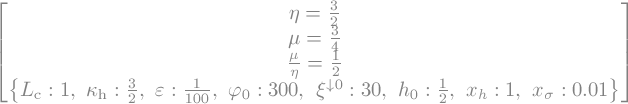

In [3]:
sub = {
        Lc: pr.model.x_1, 
        varepsilon: pr.model.varepsilon, 
        varphi_0: pr.model.varphi_0,
        xiv_0: pr.model.xiv_0,
        kappa_h: pr.model.kappa_h,
        h_0: pr.model.h_0,
        x_sigma: pr.model.x_sigma,
        x_h: pr.model.x_h
}
Matrix([Eq(eta,pr.model.eta), Eq(mu,pr.model.mu), Eq(mu/eta,pr.model.mu/pr.model.eta), 
        sub])

# Equations

## Basics

In [4]:
gmeq = Equations( eta=pr.model.eta, mu=pr.model.mu,
                  beta_type=pr.model.beta_type, varphi_type=pr.model.varphi_type, 
                  do_raw=True, do_nothing=True )

In [5]:
def eqns(eqn_list):
    return [getattr(gmeq, eqn) for eqn in eqn_list]

## Vector $\mathbf{{r}}$

In [6]:
gmeq.define_r_eqns()

In [7]:
eqns(['rx_r_alpha_eqn', 'rz_r_alpha_eqn'])

## Covector $\mathbf{\widetilde{p}}$

In [8]:
gmeq.define_p_eqns()

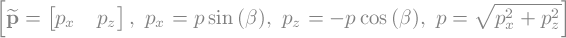

In [9]:
eqns(['p_covec_eqn', 'px_p_beta_eqn', 'pz_p_beta_eqn', 'p_norm_pxpz_eqn'])

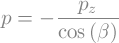

In [10]:
gmeq.p_pz_cosbeta_eqn

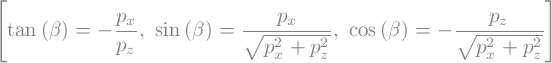

In [11]:
eqns(['tanbeta_pxpz_eqn', 'sinbeta_pxpz_eqn', 'cosbeta_pxpz_eqn'])

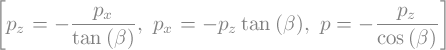

In [12]:
eqns(['pz_px_tanbeta_eqn', 'px_pz_tanbeta_eqn', 'p_pz_cosbeta_eqn'])

## Erosion model

### $\xi$ model

In [13]:
gmeq.define_xi_eqns()

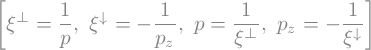

In [14]:
eqns(['xi_p_eqn', 'xiv_pz_eqn', 'p_xi_eqn', 'pz_xiv_eqn'])

In [15]:
gmeq.define_xi_model_eqn()

In [16]:
eqns(['xi_varphi_beta_eqn'])

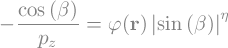

In [17]:
gmeq.xi_varphi_beta_eqn.subs(e2d(gmeq.xi_p_eqn)).subs(e2d(gmeq.p_pz_cosbeta_eqn))

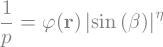

In [18]:
gmeq.xi_varphi_beta_eqn.subs(e2d(gmeq.xi_p_eqn))

### $\xi$ related eqns

In [19]:
gmeq.define_xi_related_eqns()

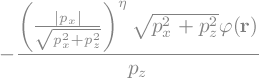

In [20]:
( (gmeq.xi_varphi_beta_eqn.rhs/cos(beta))
    .subs(e2d(gmeq.tanbeta_pxpz_eqn))
    .subs(e2d(gmeq.cosbeta_pxpz_eqn))
    .subs(e2d(gmeq.sinbeta_pxpz_eqn))
    .subs({(-Abs(px)/pz)**eta:px**eta/(-pz)**eta})
)

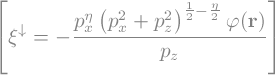

In [21]:
eqns(['xiv_varphi_pxpz_eqn'])

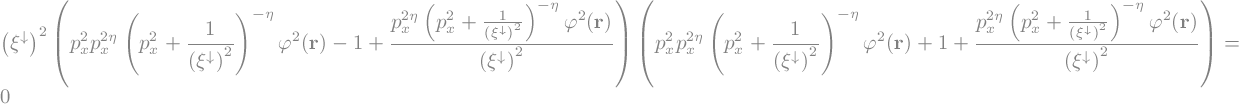

In [22]:
gmeq.px_xiv_varphi_eqn

### $\varphi$ model

In [23]:
gmeq.define_varphi_model_eqn()
gmeq.varphi_type

'ramp'

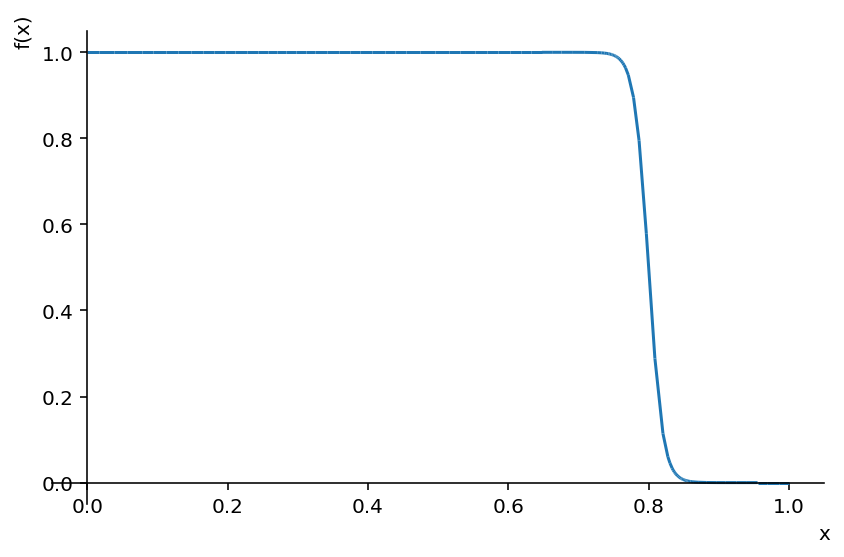

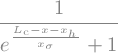

In [24]:
smooth_step_fn = 1/(1+sy.exp(((x_1-x_h)-x)/x_sigma))
sy.plot(smooth_step_fn.subs({x:x_1-x}).subs({x_sigma:0.01, x_h:0.8, x_1:1}), (x,0,1));
simplify(smooth_step_fn)

In [25]:
tmpsub = {x_sigma:0.01, chi:30, x_h:0.8, x_1:1, varphi_0:1, mu:2}

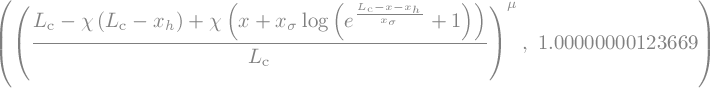

In [26]:
smooth_break_fn = simplify( ((chi/(x_1))*(
    sy.integrate(smooth_step_fn,x))-chi*(1-x_h/x_1)+1)**mu )
smooth_break_fn, smooth_break_fn.subs({x:x_1-rx}).subs({rx:x_1}).subs(tmpsub)

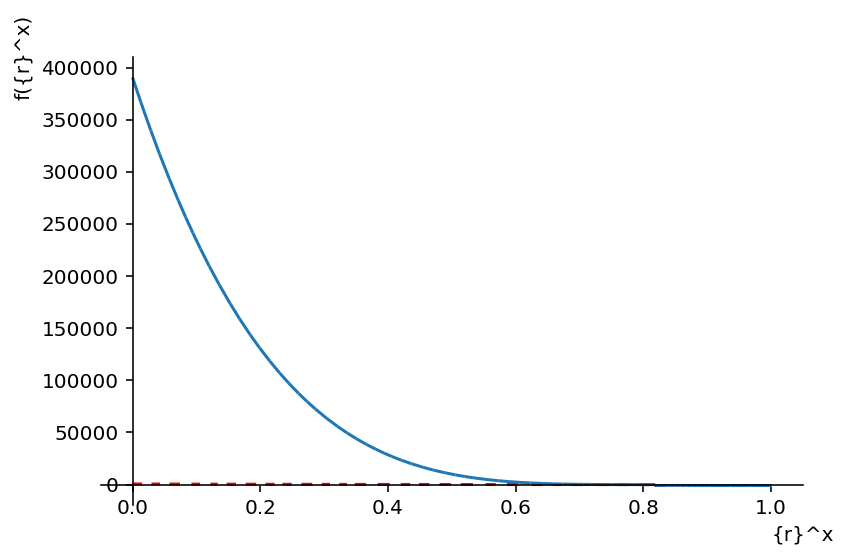

In [27]:
p=sy.plot(smooth_break_fn.subs({x:x_1-rx}).subs(tmpsub),
          gmeq.varphi_model_rampflatmu_eqn.rhs.subs(tmpsub), 
          (rx,0,1), show=False);
p[0].line_color = ['red','white']
p.show()

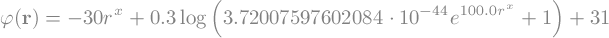

In [28]:
gmeq.varphi_model_rampflat_eqn.subs(tmpsub)

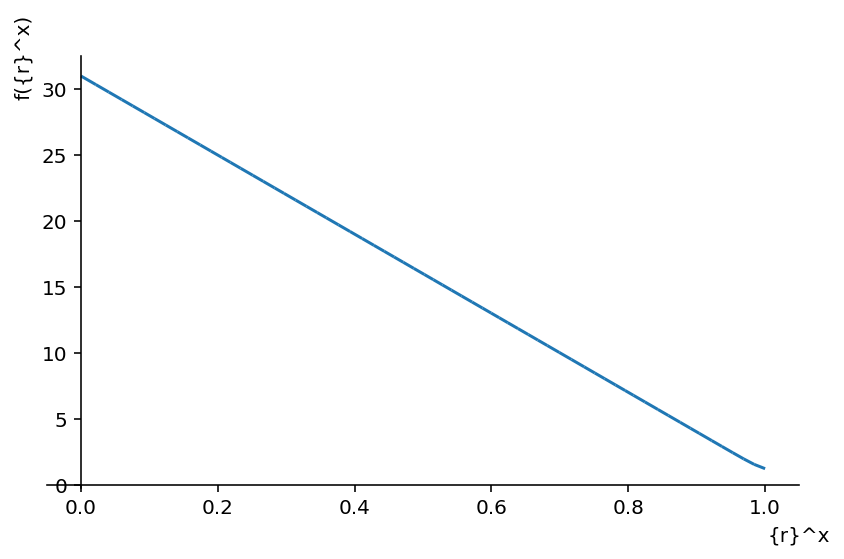

In [29]:
sy.plot(gmeq.varphi_model_rampflat_eqn.rhs.subs(tmpsub), (rx,0,1));

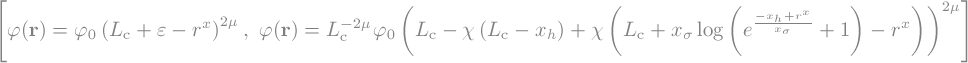

In [30]:
eqns(['varphi_model_ramp_eqn','varphi_model_rampflatmu_eqn'])

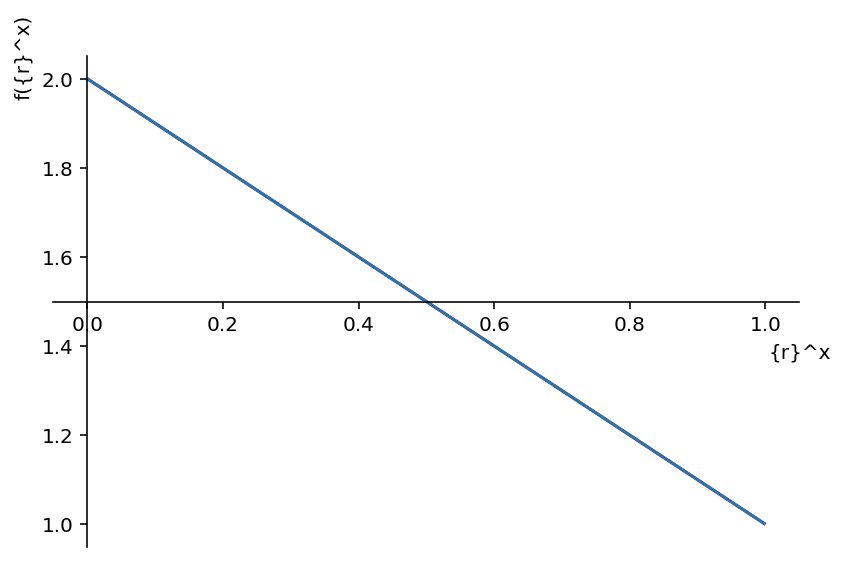

In [31]:
p = sy.plot(gmeq.varphi_model_ramp_eqn.rhs
            .subs({varphi_0:1, varepsilon:1, x_1:1, mu:Rational(1,2)}),
 gmeq.varphi_model_ramp_eqn.rhs.subs({varphi_0:1, varepsilon:1, x_1:1, mu:Rational(1,2)}), 
        (rx,0,1), show=False);
p[0].line_color = 'red'
p.show()

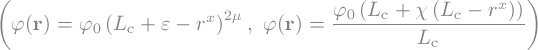

In [32]:
gmeq.varphi_model_ramp_eqn.subs({x_sigma:0}), \
    simplify(gmeq.varphi_model_rampflat_eqn.subs({x_sigma:0}))

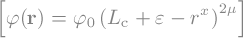

In [33]:
eqns(['varphi_rx_eqn'])

### $\varphi$ related eqns

In [34]:
gmeq.define_varphi_related_eqns()

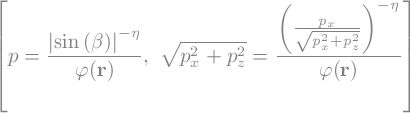

In [35]:
eqns(['p_varphi_beta_eqn', 'p_varphi_pxpz_eqn'])

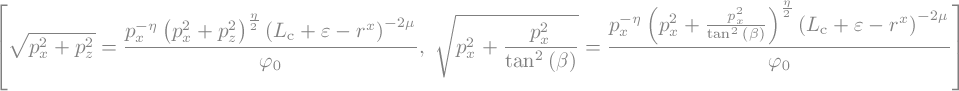

In [36]:
eqns(['p_rx_pxpz_eqn', 'p_rx_tanbeta_eqn'])

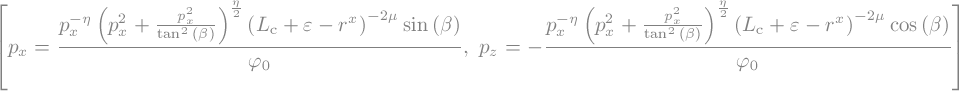

In [37]:
eqns(['px_beta_eqn', 'pz_beta_eqn'])

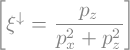

In [38]:
eqns(['xiv_pxpz_eqn'])

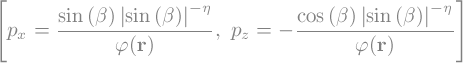

In [39]:
eqns(['px_varphi_beta_eqn', 'pz_varphi_beta_eqn'])

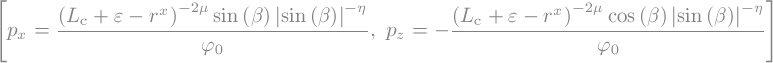

In [40]:
eqns(['px_varphi_rx_beta_eqn','pz_varphi_rx_beta_eqn'])

### $p_x$ polynomial

This polynomial in $p_x$, or in $\tan\beta=-p_x/p_z=-p_x\xi^{\downarrow 0}$, is a polynomial in gradient $dz/dx$, which means (if it can be solved for) it can be integrated to give $z(x)$.

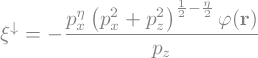

In [41]:
gmeq.xiv_varphi_pxpz_eqn

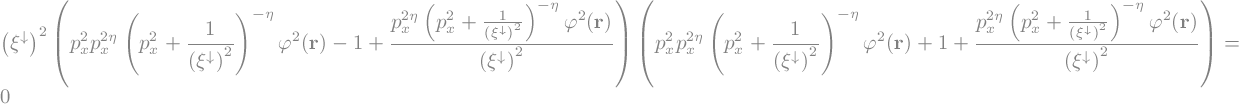

In [42]:
gmeq.px_xiv_varphi_eqn

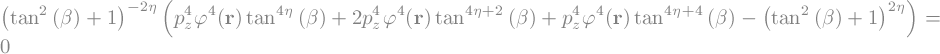

In [43]:
p0 = Eq( (simplify(expand(gmeq.px_xiv_varphi_eqn.lhs/xiv**2).subs({px:-pz*tan(beta), xiv:-1/pz})) 
    .subs({cos(beta):1/sqrt(1+tan(beta)**2)})), 0)
p0

In [44]:
p_eta1p5 = Eq( numer(factor(p0.lhs.subs({eta:gmeq.eta}))), 0)
p_eta1p5

In [45]:
gmeq.define_px_poly_eqn(eta_choice=gmeq.eta)

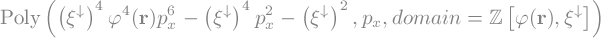

In [46]:
gmeq.poly_px_xiv_varphi_eqn

In [47]:
eqns(['poly_px_xiv0_eqn'])

AttributeError: 'Equations' object has no attribute 'poly_px_xiv0_eqn'

In [ ]:
# gmeq.define_px_poly_eqn(eta_choice=Rational(3,2))

In [ ]:
# gmeq.poly_px_xiv_varphi_eqn

In [ ]:
# eqns(['poly_px_xiv0_eqn'])

## Fundamental function & Hamiltonian

In [ ]:
gmeq.define_Fstar_eqns()
gmeq.define_H_eqns()

In [ ]:
eqns(['Okubo_Fstar_eqn', 'Fstar_eqn'])

$
    \mathcal{H} := \dfrac{\varphi^2 p_x^{2\eta}}{2\left(p_x^2+p_z^2\right)^{\eta-1}}
$

In [ ]:
eqns(['H_eqn', 'H_varphi_rx_eqn'])

## Hamilton's equations

ODE $\dot{\mathbf{r}}$ components

In [ ]:
gmeq.define_rdot_eqns()

In [ ]:
eqns(['rdotx_rdot_alpha_eqn', 'rdotz_rdot_alpha_eqn'])

Derivation of $v^z$ gives zero if the Hamiltonian has no dependence on $p_z$, which happens if the angle function is $\sin\beta$ and if its exponent is $\eta=1$. From this point on, such a model fails.

In [ ]:
simplify( sy.diff(gmeq.H_eqn,px) ), simplify( sy.diff(gmeq.H_eqn,pz) )

In [ ]:
eqns(['rdotx_pxpz_eqn', 'rdotz_pxpz_eqn'])

In [ ]:
eqns(['rdotz_on_rdotx_eqn', 'rdotz_on_rdotx_tanbeta_eqn'])

In [ ]:
eqns(['rdot_vec_eqn', 'rdot_p_unity_eqn'])

ODE $\dot{\mathbf{\widetilde{p}}}$ components

In [ ]:
gmeq.define_pdot_eqns()

In [ ]:
Matrix(eqns(['pdotx_pxpz_eqn', 'pdotz_pxpz_eqn', 'pdot_covec_eqn']))

Combined ODE components

In [ ]:
gmeq.define_Hamiltons_eqns()

In [ ]:
gmeq.hamiltons_eqns #, gmeq.hamiltons_eqns.subs({zeta:gmeq.zeta})

In [ ]:
gmeq.hamiltons_eqns[0].subs({varepsilon:0})

## Non-dimensionalization

In [ ]:
gmeq.nondimensionalize()

In [ ]:
sub.update({
#     xiv_0: pr.model.xiv_0,
#     varepsilon: pr.model.varepsilon,
    beta_0: asin(Rational(1,100))
})
sub

In [ ]:
gmeq.rx_rxhat_eqn, gmeq.rz_rzhat_eqn

In [ ]:
gmeq.varepsilon_varepsilonhat_eqn, gmeq.varepsilonhat_varepsilon_eqn

In [ ]:
gmeq.varphihat_eqn

In [ ]:
gmeq.xi_rxhat_eqn

In [ ]:
gmeq.xih0_eqn, gmeq.xiv0_eqn

In [ ]:
sub

In [ ]:
gmeq.xiv0_eqn

In [ ]:
s = symbols('s',  real=True)
sinbeta0_solns = ( solve( Eq(gmeq.xiv0_eqn.lhs**2, 
   ( (gmeq.xiv0_eqn.rhs**2).subs({varepsilonhat:0, cos(beta_0)**2:(1-sin(beta_0)**2)})
    .subs({eta:pr.model.eta}) )).subs({sin(beta_0):s}), s) )

In [ ]:
sinbeta0_soln = simplify( sinbeta0_solns[1] )
sinbeta0_soln

In [ ]:
N((( re(N(sinbeta0_soln.subs(sub))) )))

In [ ]:
gmeq.xih0_xiv0_eqn

In [ ]:
gmeq.th0_xih0_eqn, gmeq.tv0_xiv0_eqn

In [ ]:
gmeq.th0_beta0_eqn, gmeq.tv0_beta0_eqn

In [ ]:
Eq(tv_0, th_0*simplify((tv_0/th_0)
                         .subs(e2d(gmeq.tv0_beta0_eqn))
                         .subs(e2d(gmeq.th0_beta0_eqn))) )

In [ ]:
gmeq.t_that_eqn, gmeq.px_pxhat_eqn, gmeq.pz_pzhat_eqn

In [ ]:
gmeq.H_varphi_rxhat_eqn

<!-- The geomorphic Hamiltonian parameterized using dimensionless variables is

$
    \mathcal{H} = \dfrac{\mathsf{Ci}^2 \left( 1-\hat{r}^x \right)^{4\mu} \hat{p}_x^{2\eta}}
              {2  \left( \hat{p}_x^2+\hat{p}_z^2 \right)^{\eta-1}}
$

where $\mathsf{Ci}$ is the channel incision number defined as

$
    \mathsf{Ci} := \dfrac{L_{\mathrm{c}}^{2\mu} \varphi_0}{\xi^{\rightarrow_0}}
                 = \left( \sin\beta_0 \right)^{1-\eta}
$ -->

The geomorphic Hamiltonian parameterized using dimensionless variables is

<!-- $
    \mathcal{H} 
%         = \dfrac{\mathsf{Ci}^{2(1-\eta)} \left( 1-\hat{r}^x \right)^{4\mu} \hat{p}_x^{2\eta}}
%                 {2  \left( \hat{p}_x^2+\hat{p}_z^2 \right)^{\eta-1}}
        = \dfrac{ \left( 1-\hat{r}^x \right)^{4\mu} \hat{p}_x^{2\eta}}
                {2 \left( \mathsf{Ci}^2 \! \left( \hat{p}_x^2+\hat{p}_z^2 \right) \right)^{\eta-1}}
$

where $\mathsf{Ci}$ is the channel incision number defined as

$
    \mathsf{Ci} := \left(
                    \dfrac{L_{\mathrm{c}}^{2\mu} \varphi_0}{\xi^{\rightarrow_0}}
                    \right)^{\tfrac{1}{1-\eta}}
                 = \sin\beta_0 
$

or more simply
 -->
$
    \mathcal{H} 
%         = \dfrac{\mathsf{Ci}^{2(1-\eta)} \left( 1-\hat{r}^x \right)^{4\mu} \hat{p}_x^{2\eta}}
%                 {2  \left( \hat{p}_x^2+\hat{p}_z^2 \right)^{\eta-1}}
        = \dfrac{ \left( 1-\hat{r}^x \right)^{4\mu} \hat{p}_x^{2\eta}}
                {2 \left( \mathsf{Ci}^2 \! \left( \hat{p}_x^2+\hat{p}_z^2 \right) \right)^{\eta-1}}
$

where the channel incision number $\mathsf{Ci}$ is defined as

$
    \mathsf{Ci} := \arcsin\,\left(\left(
                    \dfrac{L_{\mathrm{c}}^{2\mu} \varphi_0}{\xi^{\rightarrow_0}}
                    \right)^{\tfrac{1}{1-\eta}}\right)
    \qquad\text{where}\quad
    \mathsf{Ci} \approx \beta_0 \quad\text{if}\quad \hat{\varepsilon} \ll 1
$

In [ ]:
gmeq.H_split

In [ ]:
gmeq.H_Ci_eqn

In [ ]:
(gmeq.Ci_xih0_eqn, (gmeq.Ci_beta0_eqn)
    , sy.trigsimp( gmeq.sinCi_beta0_eqn.subs({varepsilonhat:0}) ))

In [ ]:
beta_0.subs(sub)

In [ ]:
( 
    gmround(( gmeq.xiv0_eqn
                 .subs({varepsilonhat:0})
                 .subs(omitdict(sub,[xiv_0]))
                 .subs({eta:pr.model.eta, mu:pr.model.mu}) ), 4),
    gmround(( gmeq.xih0_eqn
                 .subs({varepsilonhat:0})
                 .subs(omitdict(sub,[xiv_0]))
                 .subs({eta:pr.model.eta, mu:pr.model.mu}) ), 4),
    gmround(( gmeq.Ci_beta0_eqn
                 .subs({varepsilonhat:0})
                 .subs(omitdict(sub,[xiv_0]))
                 .subs({eta:pr.model.eta, mu:pr.model.mu}) ), 4) 
)

In [ ]:
( 
    gmround(( gmeq.xiv0_eqn
                 .subs(e2d(gmeq.varepsilonhat_varepsilon_eqn))
                 .subs(omitdict(sub,[xiv_0]))
                 .subs({eta:pr.model.eta, mu:pr.model.mu}) ), 4),
    gmround(( gmeq.xih0_eqn
                 .subs(e2d(gmeq.varepsilonhat_varepsilon_eqn))
                 .subs(omitdict(sub,[xiv_0]))
                 .subs({eta:pr.model.eta, mu:pr.model.mu}) ), 4),
    gmround(( gmeq.Ci_beta0_eqn
                 .subs(e2d(gmeq.varepsilonhat_varepsilon_eqn))
                 .subs(omitdict(sub,[xiv_0]))
                 .subs({eta:pr.model.eta, mu:pr.model.mu}) ), 4) 
)

In [ ]:
simplify( sy.diff(gmeq.H_Ci_eqn,pxhat) ), simplify( sy.diff(gmeq.H_Ci_eqn,pzhat) )

In [ ]:
simplify( -sy.diff(gmeq.H_Ci_eqn,rxhat) )#, -simplify( sy.diff(gmeq.H_Ci_eqn,rzhat) )

In [ ]:
Matrix([gmeq.rdotxhat_eqn, gmeq.rdotzhat_eqn])

In [ ]:
Matrix([gmeq.pdotxhat_eqn, gmeq.pdotzhat_eqn])

## Non-dimensionalized Hamilton's equations

In [ ]:
gmeq.define_nodimensionalized_Hamiltons_eqns()

In [ ]:
gmeq.hamiltons_ndim_eqns

## Angles

### $\tan\alpha$

In [ ]:
gmeq.define_tanalpha_eqns()

In [ ]:
gmeq.rdotz_on_rdotx_eqn

In [ ]:
eqns(['tanalpha_rdot_eqn', 'tanalpha_pxpz_eqn', 'tanalpha_beta_eqn'])

In [ ]:
solve( simplify( gmeq.tanalpha_beta_eqn.subs({eta:gmeq.eta}) ), tan(beta) )

### $\tan\beta_c$, $\tan\alpha_c$

In [ ]:
gmeq.define_tanbeta_eqns()

In [ ]:
gmeq.tanbeta_rdotxz_pz_eqn, gmeq.tanbeta_rdotxz_xiv_eqn

In [ ]:
gmeq.tanbeta_alpha_eqns

In [ ]:
gmeq.tanbeta_crit_eqns

In [ ]:
gmeq.tanalpha_crit_eqns

In [ ]:
gmeq.tanbeta_crit_eqn, gmeq.tanalpha_crit_eqn

In [ ]:
Matrix([(  Eq(eta,eta_), 
           gmeq.tanbeta_crit_eqn.subs({eta:eta_}),
           Eq(beta_crit, round(N(deg(atan(gmeq.tanbeta_crit_eqn.rhs.subs({eta:eta_})))),2)),
           gmeq.tanalpha_crit_eqn.subs({eta:eta_}),
           Eq(alpha_crit, round(N(deg(atan(gmeq.tanalpha_crit_eqn.rhs.subs({eta:eta_})))),2)) )
 for eta_ in [Rational(3,2),Rational(1,2),Rational(1,3),Rational(1,4)]])

In [ ]:
eta_ = Rational(1,2)
ac_ = N(deg(atan(gmeq.tanalpha_crit_eqn.rhs.subs({eta:eta_}))))
bc_ = N(deg(atan(gmeq.tanbeta_crit_eqn.rhs.subs({eta:eta_}))))
ac_, bc_, ac_-bc_+90, N(deg(atan(sqrt(eta_)))), N(deg(atan((eta_-1)/(2*sqrt(eta_)))))

## Metric tensor

In [ ]:
gmeq.define_g_eqns()

In [ ]:
eqns(['gstar_varphi_pxpz_eqn', 'det_gstar_varphi_pxpz_eqn'])

In [ ]:
sub1 = {px:0.01,pz:-1,varphi_r:1, varphi_0:1,x_1:1,rx:0, varepsilon:0}
sub2 = {px:1,pz:-1,varphi_r:1, varphi_0:1,x_1:1,rx:0, varepsilon:0}

In [ ]:
gmeq.g_varphi_pxpz_eqn, gmeq.g_varphi_pxpz_eqn.subs(sub1), gmeq.g_varphi_pxpz_eqn.subs(sub2)

In [ ]:
gmeq.gstar_eigen_varphi_pxpz[0][0], gmeq.gstar_eigen_varphi_pxpz[1][0] 

In [ ]:
[ev for ev in gmeq.gstar_eigenvalues]

In [ ]:
rnd = lambda x: round(x,8)
(gmeq.gstar_eigenvalues.subs(sub1)).applyfunc(rnd), (gmeq.gstar_eigenvalues.subs(sub2)).applyfunc(rnd)

In [ ]:
gmeq.gstar_eigenvectors[0] if gmeq.gstar_eigenvectors is not None else None

In [ ]:
gmeq.gstar_eigenvectors[1] if gmeq.gstar_eigenvectors is not None else None

## Indicatrix & figuratrix

In [ ]:
gmeq.define_idtx_fgtx_eqns()

Closed-form solutions for the indicatrix & figuratrix can be found if the following is solvable in $\cos^2\beta$:

In [ ]:
gmeq.pz_cosbeta_varphi_eqn if gmeq.pz_cosbeta_varphi_eqn is not None else None

In [ ]:
expand( Eq( gmeq.pz_cosbeta_varphi_eqn.lhs*denom(gmeq.pz_cosbeta_varphi_eqn.rhs)
               -numer(gmeq.pz_cosbeta_varphi_eqn.rhs),0 ) )

In [ ]:
factor( gmeq.cosbetasqrd_pz_varphi_solns[0] ) \
    if gmeq.cosbetasqrd_pz_varphi_solns is not None else None

In [ ]:
# cosbetasqrd_pz_varphi_solns = solve( gmeq.pz_cosbeta_varphi_eqn, cos(beta)**2 )
# cosbetasqrd_pz_varphi_solns

In [ ]:
# N( cosbetasqrd_pz_varphi_solns[0].subs({varphi:10,pz:-0.1}) )

In [ ]:
factor( gmeq.fgtx_cossqrdbeta_pz_varphi_eqn ) \
    if gmeq.fgtx_cossqrdbeta_pz_varphi_eqn is not None else None

In [ ]:
factor( gmeq.fgtx_tanbeta_pz_varphi_eqn  )\
    if gmeq.fgtx_tanbeta_pz_varphi_eqn is not None else None

In [ ]:
gmeq.fgtx_px_pz_varphi_eqn if gmeq.fgtx_px_pz_varphi_eqn is not None else None

In [ ]:
factor( gmeq.idtx_rdotx_pz_varphi_eqn ) if gmeq.idtx_rdotx_pz_varphi_eqn is not None \
                              else None

In [ ]:
gmeq.idtx_rdotz_pz_varphi_eqn if gmeq.idtx_rdotz_pz_varphi_eqn is not None \
                              else None

## Geodesic equations

### Preamble

In [ ]:
gmeq.prep_geodesic_eqns(parameters=sub)

In [ ]:
gmeq.tanalpha_rdot_eqn

In [ ]:
gmeq.gstar_ij_tanbeta_mat if gmeq.gstar_ij_tanbeta_mat is not None else None

In [ ]:
gmeq.tanbeta_poly_eqn

In [ ]:
gmeq.tanbeta_eqn

In [ ]:
gmeq.gstar_ij_tanalpha_mat[0] if gmeq.gstar_ij_tanalpha_mat is not None else None

In [ ]:
gmeq.gstar_ij_tanalpha_mat[1] if gmeq.gstar_ij_tanalpha_mat is not None else None

In [ ]:
gmeq.gstar_ij_tanalpha_mat[2] if gmeq.gstar_ij_tanalpha_mat is not None else None

In [ ]:
gmeq.gstar_ij_tanalpha_mat[3] if gmeq.gstar_ij_tanalpha_mat is not None else None

In [ ]:
gmeq.gstar_ij_mat[0] if gmeq.gstar_ij_mat is not None else None

In [ ]:
gmeq.gstar_ij_mat[1] if gmeq.gstar_ij_mat is not None else None

In [ ]:
gmeq.gstar_ij_mat[2] if gmeq.gstar_ij_mat is not None else None

In [ ]:
gmeq.gstar_ij_mat[3] if gmeq.gstar_ij_mat is not None else None

In [ ]:
gmeq.g_ij_tanalpha_mat[0] if gmeq.g_ij_tanalpha_mat is not None else None

In [ ]:
gmeq.g_ij_tanalpha_mat[1] if gmeq.g_ij_tanalpha_mat is not None else None

In [ ]:
gmeq.g_ij_tanalpha_mat[2] if gmeq.g_ij_tanalpha_mat is not None else None

In [ ]:
gmeq.g_ij_tanalpha_mat[3] if gmeq.g_ij_tanalpha_mat is not None else None

In [ ]:
gmeq.g_ij_mat[0] if gmeq.g_ij_mat is not None else None

In [ ]:
gmeq.g_ij_mat[1] if gmeq.g_ij_mat is not None else None

In [ ]:
gmeq.g_ij_mat[2] if gmeq.g_ij_mat is not None else None

In [ ]:
gmeq.g_ij_mat[3] if gmeq.g_ij_mat is not None else None

### Main

In [ ]:
gmeq.define_geodesic_eqns(parameters=sub)

In [ ]:
gmeq.geodesic_eqns[0:2] if gmeq.geodesic_eqns is not None else None

In [ ]:
factor(gmeq.geodesic_eqns[2]) if gmeq.geodesic_eqns is not None else None

In [ ]:
factor(gmeq.geodesic_eqns[3]) if gmeq.geodesic_eqns is not None else None

In [ ]:
([eqn_.subs({rdotx:0.1,rdotz:0.01*sy.sign(gmeq.eta)}) for eqn_ in gmeq.geodesic_eqns[2:4]] \
    if gmeq.geodesic_eqns is not None else None)

## Initial conditions

In [ ]:
gmeq.prep_ibc_eqns()

In [ ]:
eqns(['pz0_xiv0_eqn','pzpx_unity_eqn'])

In [ ]:
gmeq.define_ibc_eqns()

In [ ]:
[[key for key in gmeq.boundary_eqns[bc_type].keys()]
   for bc_type in gmeq.boundary_eqns.keys()]

In [ ]:
[[value for value in gmeq.boundary_eqns[bc_type].values()]
  for bc_type in gmeq.boundary_eqns.keys()]

In [ ]:
gmeq.set_ibc_eqns()

In [ ]:
eqns(['rz_initial_eqn','tanbeta_initial_eqn'])

In [ ]:
gmeq.p_initial_eqn

In [ ]:
eqns(['px_initial_eqn','pz_initial_eqn'])

## Misc

In [ ]:
x = symbols('x',  real=True)
y = symbols('y',  real=True)
b = symbols('b',  real=True)

In [ ]:
F_eqn = Eq(F, (x**2+y**2)/(3*sqrt(x**2+y**2)+x)   )
F_eqn

In [ ]:
g_eqn = Eq(g, simplify(
    Matrix([[ sy.diff(F_eqn.rhs,x,x), sy.diff(F_eqn.rhs,x,y) ],
            [ sy.diff(F_eqn.rhs,y,x), sy.diff(F_eqn.rhs,y,y) ]]) ))
g_eqn

In [ ]:
simplify( g_eqn.rhs[0]*g_eqn.rhs[3] - g_eqn.rhs[1]*g_eqn.rhs[2] )

In [ ]:
b_mat = simplify(
    Matrix([[ b**3, 1 ],
            [ 1, 2*b**3+3*b ]]) )
b_mat, b_mat.subs({b:sqrt(2)/2}), b_mat.det().subs({b:sqrt(2)/2})

In [ ]:
b_mat_eigenvals = [simplify(ev_[0]) for ev_ in (b_mat.eigenvects())]
b_mat_eigenvals

In [ ]:
[ev_.subs({b:sqrt(2)/2}) for ev_ in b_mat_eigenvals]